# Pset 5: Traffic
Objectives: 
- to write an AI to identify which traffic sign appears in a photograph.
- to learn how to research about and use basic functions in libraries/frameworks (TensorFlow, OpenCV)

To do this pset well, you need to take time and research and read up on the documentation. Do not be in a hurry to finish but take time and investigate the aspects you don't know or don't understand very well. This pset helps you ** learn how to learn**.

Before continuing, make a copy of the notebook to your Drive.



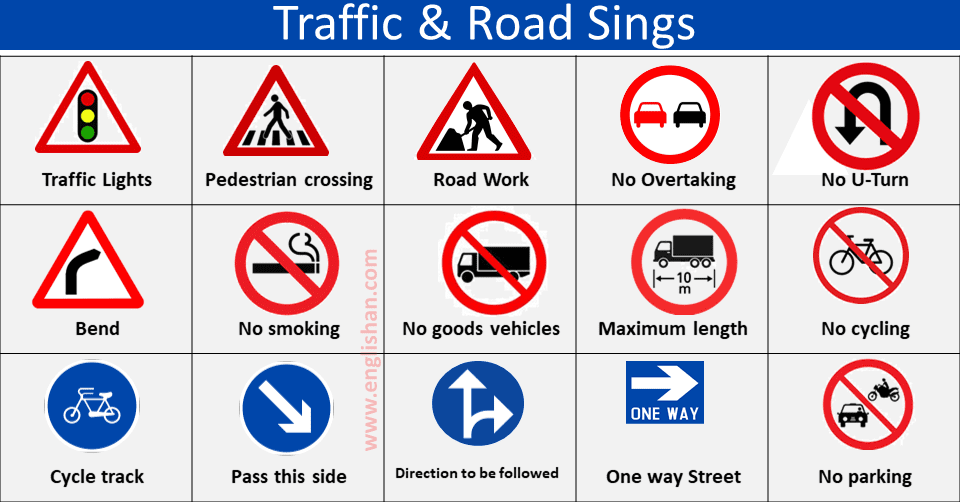

# Background
As research continues in the development of self-driving cars, one of the key challenges is computer vision, allowing these cars to develop an understanding of their environment from digital images. In particular, this involves the ability to recognize and distinguish road signs - stop signs, speed limit signs, yield signs, and more.

In this project, you'll use TensorFlow to build a neural network to classify road signs based on an image of those signs. To do so, you'll need a labeled dataset: a collection of images that have already been categorized by the road sign represented in them.

Several such data sets exist, but for this project, we'll use the [German Traffic Sign Recognition Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=news) (GTSRB) dataset, which contains thousands of images of 43 different kinds of road signs.

# Getting started

The cell below downloads the data set for this project (*onto the colab runtime*) and unzips it. 

To inspect the dataset (highly recommended), you can download the dataset directly from [this link](https://cdn.cs50.net/ai/2020/x/projects/5/gtsrb.zip) to your computer and inspect the contents.

NB: the necesssary dependencies for this project are already installed in colab: `opencv-python` for image processing, `scikit-learn` for ML-related functions, and `tensorflow` for neural networks.

In [ ]:
!wget https://cdn.cs50.net/ai/2020/x/projects/5/gtsrb.zip
!unzip -q gtsrb.zip -d extras
!rm gtsrb.zip

# Understanding

First, take a look at the data set by opening the `gtsrb` directory. You’ll notice `43` subdirectories in this dataset, numbered `0` through `42`. Each numbered subdirectory represents a different category (a different type of road sign). Within each traffic sign’s directory is a collection of images of that type of traffic sign.

Next, take a look at the code cell in this notebook under the Section called `Driver`. In the `driver` function, the data and corresponding labels are loaded from the data directory (via the `load_data` function) and split into training and testing sets. After that, the `get_model` function is called to obtain a compiled neural network that is then fitted on the training data. The model is then evaluated on the testing data. Finally, the trained model is saved to disk; since we're working on colab, the model is saved on the runtime. If you want to retain a copy you would need to download it to your local machine.

The `load_data` and `get_model` functions are left to you to implement in the cells/sections below.

In [ ]:
# Necessary modules
import cv2
import numpy as np
import os
import sys
import tensorflow as tf

from sklearn.model_selection import train_test_split

# Function implementations
In the implementation of `load_data` and `get_model`, stick to the specifications below.

Ultimately, much of this project is about exploring documentation and investigating different options in `cv2` and `tensorflow` and seeing what results you get when you try them!

**Before implementing the two functions, you might want to peruse through the hints listed in the Hints Section further down.**

## Load data

The `load_data` function should accept as an argument `data_dir`, representing the path to a directory where the data is stored, and return image arrays and labels for each image in the data set. Since we're running from a colab runtime, when using this `load_data` in the `driver` function, we will set the `data_dir` argument to './', which signifies 'the present working directory'.

You may assume that `data_dir` will contain one directory named after each category, numbered `0` through `NUM_CATEGORIES - 1`. Inside each category directory will be some number of image files.

Use the OpenCV-Python module (`cv2`) to read each image as a `numpy.ndarray` (a numpy multidimensional array). To pass these images into a neural network, the images will need to be the same size, so be sure to resize each image to have width `IMG_WIDTH` and height `IMG_HEIGHT`.

The function should return a tuple (`images`, `labels`). `images` should be a list of all of the images in the data set, where each image is represented as a `numpy.ndarray` of the appropriate size. `labels` should be a list of integers, representing the category number for each of the corresponding images in the images list.

Your function should be platform-independent: that is to say, it should work regardless of operating system. Note that on ubuntu and macOS, the / character is used to separate path components, while the \ character is used on Windows. Use `os.sep` and `os.path.join` as needed instead of using your platform’s specific separator character.

In [ ]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.
    
    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.
    
    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    images, labels = [], []
    
    data_itr = os.scandir(data_dir)
    for data_cat in data_itr:
        img_itr = os.scandir(data_cat.path)
        for image in img_itr:
            
            picture = cv2.imread(image.path)
            pic = cv2.resize(
                picture,
                dsize=(IMG_WIDTH, IMG_HEIGHT),
                interpolation=cv2.INTER_CUBIC
            )
            pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
            images.append(pic)
            labels.append(int(data_cat.name))
        
        img_itr.close()
    data_itr.close()
    
    return images, labels

## Get model

The `get_model` function should return a compiled neural network model.

You may assume that the input to the neural network will be of the shape (`IMG_WIDTH`, `IMG_HEIGHT`, `3`) (that is, an array representing an image of width `IMG_WIDTH`, height `IMG_HEIGHT`, and `3` values for each pixel for red, green, and blue).

The output layer of the neural network should have `NUM_CATEGORIES` units, one for each of the traffic sign categories.

The number of layers and the types of layers you include in between are up to you. You may wish to experiment with:
- different numbers of convolutional and pooling layers
- different numbers and sizes of filters for convolutional layers
- different pool sizes for pooling layers
- different numbers and sizes of hidden layers
- dropout

In [ ]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        tf.keras.layers.Conv2D(3, 3, activation='sigmoid'),
        tf.keras.layers.Conv2D(3, 3, activation='relu'),
        tf.keras.layers.Flatten(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        tf.keras.layers.Dense(100, activation='sigmoid'),
        tf.keras.layers.Dense(NUM_CATEGORIES)
    ])
    
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    
    return model

In [ ]:
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43

model = get_model()
model.summary()

# Driver
The `driver` function below makes use of the `load_data` and `get_model` functions implemented above.

In [ ]:
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4


def driver():
    # Get image arrays and labels for all image files
    datapath = os.path.join('extras','gtsrb')
    images, labels = load_data(datapath)
    
    # Split data into training and testing sets
    labels = tf.keras.utils.to_categorical(
        labels, num_classes=None, dtype='float32'
    )
    img_train, img_test, lbl_train, lbl_test = train_test_split(
        np.array(images), np.array(labels),
        test_size=TEST_SIZE
    )
    
    # Get a compiled neural network
    model = get_model()
    
    # Fit model on training data
    model.fit(img_train, lbl_train, epochs=EPOCHS)
    
    # Evaluate neural network performance
    model.evaluate(img_test,  lbl_test, verbose=2)
    
    # Save model to file
    filename = 'my_traffic_model.h5'
    filepath = os.path.join('extras', filename)
    model.save(filepath)
    print(f"Model saved to {filepath}.")


In [ ]:
driver()

# Hints

- You can make reference to this [MNIST notebook](https://colab.research.google.com/drive/1GM1Jk9pcI44NaZwLav_s9r_Vkq60Jx7K?usp=sharing) we discussed in class, together with other resources.
- Check out the official [Tensorflow Keras overview](https://www.tensorflow.org/guide/keras/overview) for some guidelines for the syntax of building neural network layers. You may find the lecture source code useful as well.
- The [OpenCV-Python](https://docs.opencv.org/4.5.2/d2/d96/tutorial_py_table_of_contents_imgproc.html) documentation may prove helpful for reading images as arrays and then resizing them.
- Once you’ve resized an image img, you can verify its dimensions by printing the value of img.shape. If you’ve resized the image correctly, its shape should be (`30`, `30`, `3`) (assuming `IMG_WIDTH` and `IMG_HEIGHT` are both `30`).
- If you’d like to practice with a smaller data set, you can download a [modified dataset](https://cdn.cs50.net/ai/2020/x/projects/5/gtsrb-small.zip) that contains only `3` different types of road signs instead of `43`. To download this smaller dataset onto your colab runtime, run the cell below. Thereafter, when running the `driver` function, use `gtsrb-small` instead of `gtsrb` as the argument for the `load_data` function.

In [ ]:
!wget https://cdn.cs50.net/ai/2020/x/projects/5/gtsrb-small.zip
!unzip -q gtsrb-small.zip -d extras
!rm gtsrb-small.zip

# Submission
- Be sure to remove all the `raise NotImplementedError` lines in all the cells above.
- Ensure that there are no errors.
- Download your `pset5.ipynb` file and submit it through SOMAS under the Assignment labeled Pset5, under Wk 12.
- **In addition, when making the submission in SOMAS, paste the link to your video in the space labelled `Online text`.**